In [21]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [5]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
#What is the structure of the dataset?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
#What are the summary statistics for numerical columns?

In [9]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
#What is the average tip given?

In [11]:
df['tip'].mean()

2.99827868852459

In [ ]:
#How many males vs females?

In [17]:
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [ ]:
#What's the average tip by gender?

In [23]:
df.groupby('sex')['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [19]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
#Distribution of total bills

<Axes: xlabel='total_bill', ylabel='Count'>

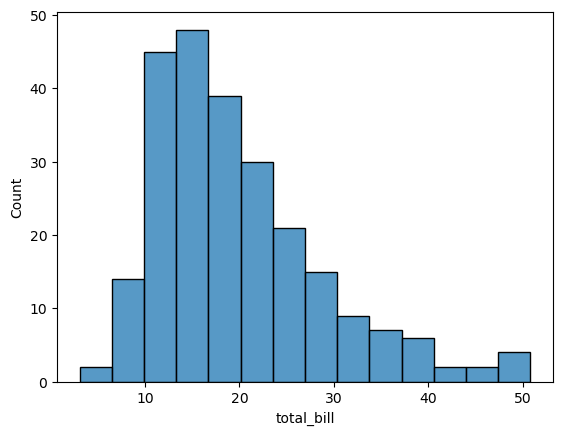

In [25]:
sns.histplot(df['total_bill'])

In [ ]:
#Which day has the highest average bill?

In [27]:
df.groupby('day')['total_bill'].mean().sort_values(ascending=False)

day
Sun     21.410000
Sat     20.441379
Thur    17.682742
Fri     17.151579
Name: total_bill, dtype: float64

In [ ]:
#Is there a correlation between total_bill and tip?

In [29]:
df[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [ ]:
#Does smoking affect tipping behavior?

<Axes: xlabel='smoker', ylabel='tip'>

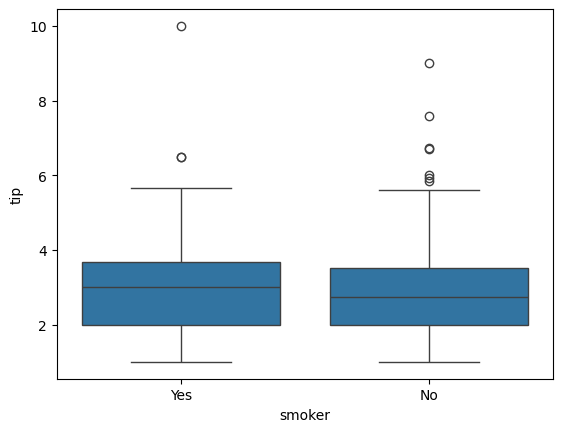

In [31]:
sns.boxplot(x='smoker', y='tip', data=df)

In [ ]:
#Tip percentage: who tips more generously (men or women)?

In [33]:
df['tip_pct'] = df['tip'] / df['total_bill']
df.groupby('sex')['tip_pct'].mean()

sex
Male      0.157651
Female    0.166491
Name: tip_pct, dtype: float64

In [ ]:
#Do larger groups tip more or less (in %) compared to smaller ones?

In [35]:
df.groupby('size')['tip_pct'].mean()

size
1    0.217292
2    0.165719
3    0.152157
4    0.145949
5    0.141495
6    0.156229
Name: tip_pct, dtype: float64

In [ ]:
#Best day/time for tipping?

In [37]:
df.groupby(['day', 'time'])['tip_pct'].mean().sort_values(ascending=False)

day   time  
Fri   Lunch     0.188765
Sun   Dinner    0.166897
Thur  Lunch     0.161301
      Dinner    0.159744
Fri   Dinner    0.158916
Sat   Dinner    0.153152
      Lunch          NaN
Sun   Lunch          NaN
Name: tip_pct, dtype: float64

In [ ]:
#Visualize tip % by time and gender

<Axes: xlabel='time', ylabel='tip_pct'>

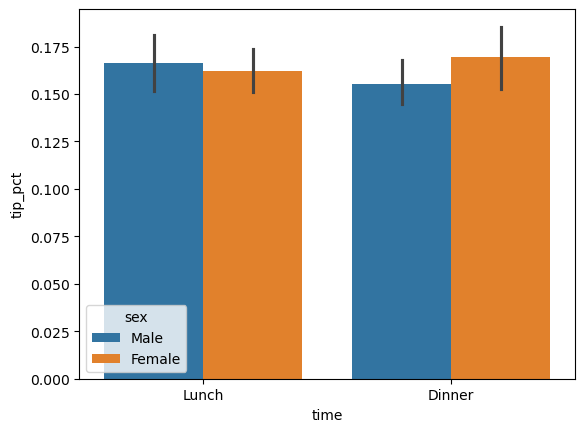

In [39]:
sns.barplot(x='time', y='tip_pct', hue='sex', data=df)

In [ ]:
#Heatmap of total bill vs tip

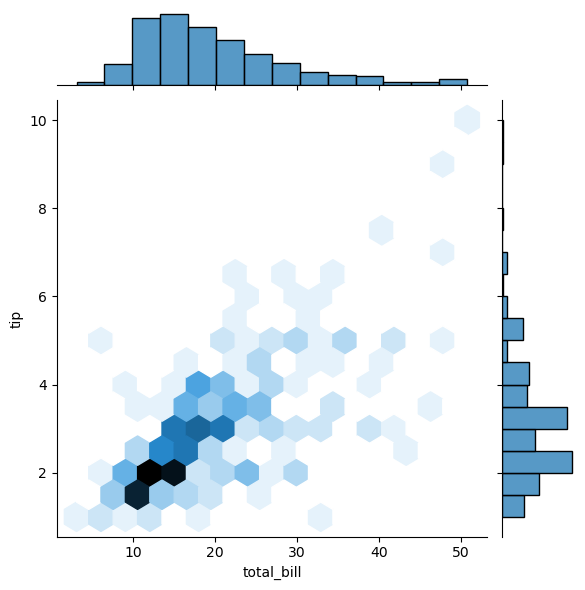

In [41]:
sns.jointplot(x='total_bill', y='tip', kind='hex', data=df)